🏁 **SIMULATION TERMINÉE**
📊 29 mesures collectées
🚨 0 anomalies détectées
💾 Fichier: data_virtual.json créé


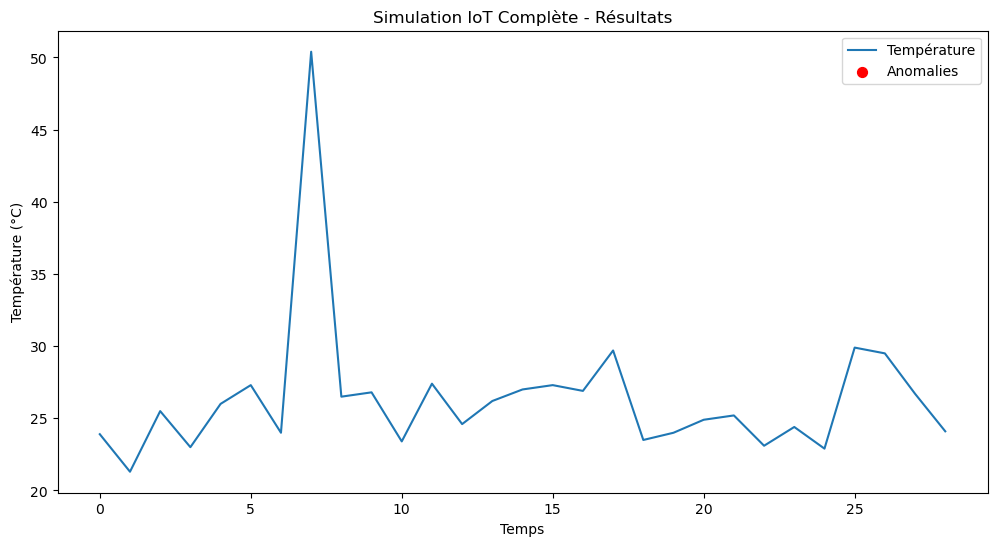

In [2]:
# iot_virtual_anomaly.py - SIMULATION COMPLÈTE IoT EMBARQUÉE 
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output  # Pour Jupyter
import json

class VirtualIoT:
    def __init__(self):
        # Simulation matériel
        self.led_status = False
        self.buffer = []
        self.data_log = []
        self.running = False
        
        # Paramètres
        self.window_size = 10
        self.threshold = 3
        self.normal_temp = 25
        self.anomaly_chance = 0.05
        
        print("🤖 **IoT VIRTUEL - Raspberry Pi Simulé**")
        print("✅ Capteur DHT22 virtuel | LED GPIO18 virtuelle")
        print("🔴 LED = ANOMALIE | 🟢 LED = Normal")
        print("-" * 50)
    
    def simulate_sensor(self):
        """Simule capteur DHT22 avec anomalies"""
        temp = np.random.normal(self.normal_temp, 2)
        if np.random.random() < self.anomaly_chance:
            temp += np.random.uniform(15, 25)
        return round(temp, 1)
    
    def moving_avg(self, data):
        """Moyenne mobile simple"""
        if len(data) < self.window_size:
            return None
        return sum(data[-self.window_size:]) / self.window_size
    
    def detect_anomaly(self, value):
        """Détection anomalie"""
        if len(self.buffer) < self.window_size:
            return False
        
        avg = self.moving_avg(self.buffer)
        std = np.std(self.buffer[-self.window_size:])
        return abs(value - avg) > self.threshold * std
    
    def update_led(self, status):
        """LED virtuelle"""
        self.led_status = status
        led_symbol = "🔴" if status else "🟢"
        return led_symbol
    
    def log_data(self, temp, is_anomaly):
        """Enregistrer données"""
        timestamp = pd.Timestamp.now()
        log = {
            'time': str(timestamp),
            'temp': temp,
            'anomaly': is_anomaly,
            'led': self.led_status
        }
        self.data_log.append(log)
    
    def save_json(self):
        """Sauvegarde fichier JSON"""
        with open('data_virtual.json', 'w') as f:
            json.dump(self.data_log[-100:], f, default=str, indent=2)
    
    def display_realtime(self, iteration):
        """Affichage temps réel - FIXÉ !"""
        clear_output(wait=True)
        temp = self.buffer[-1] if self.buffer else 0
        led = self.update_led(self.led_status)
        
        # 🔥 LIGNE 85 FIXÉE : sum(1 for x in ... if x['anomaly'])
        recent_logs = self.data_log[-50:] if len(self.data_log) >= 50 else self.data_log
        anomalies_count = sum(1 for x in recent_logs if x['anomaly'])
        
        print("🤖 **IoT VIRTUEL - TEMPS RÉEL**")
        print(f"📊 Mesure #{iteration} | Temp: {temp}°C | {led}")
        print(f"📈 Buffer: {len(self.buffer)}/50 | Anomalies: {anomalies_count}")
        print("-" * 50)
        
        # Graphique simple
        if len(self.buffer) > 10:
            plt.figure(figsize=(10, 3))
            plt.plot(self.buffer[-50:], 'b-', label='Température')
            if self.led_status:
                plt.scatter(-1, temp, color='red', s=100, label='🚨 ANOMALIE')
            plt.ylim(0, 50)
            plt.title('Capteur Virtuel - Live')
            plt.legend()
            plt.show()
    
    def run_simulation(self, duration=60):
        """Boucle principale"""
        self.running = True
        iteration = 0
        
        print(f"⏱️  Simulation {duration}s démarrée...")
        start_time = time.time()
        
        while self.running and (time.time() - start_time) < duration:
            temp = self.simulate_sensor()
            self.buffer.append(temp)
            if len(self.buffer) > 50:
                self.buffer.pop(0)
            
            is_anomaly = self.detect_anomaly(temp)
            self.update_led(is_anomaly)
            alert = "🚨 ANOMALIE!" if is_anomaly else "✅ Normal"
            
            self.log_data(temp, is_anomaly)
            
            iteration += 1
            self.display_realtime(iteration)
            
            if iteration % 10 == 0:
                self.save_json()
                print(f"💾 data_virtual.json sauvegardé")
            
            time.sleep(1)
        
        self.running = False
        self.final_report()

    def final_report(self):
        """Rapport final"""
        clear_output(wait=True)
        print("🏁 **SIMULATION TERMINÉE**")
        print(f"📊 {len(self.data_log)} mesures collectées")
        print(f"🚨 {sum(1 for x in self.data_log if x['anomaly'])} anomalies détectées")
        print(f"💾 Fichier: data_virtual.json créé")
        
        # Graphique final
        df_final = pd.DataFrame(self.data_log)
        plt.figure(figsize=(12, 6))
        plt.plot(df_final['temp'], label='Température')
        anomalies = df_final[df_final['anomaly'] == True]
        plt.scatter(anomalies.index, anomalies['temp'], color='red', s=50, label='Anomalies')
        plt.title('Simulation IoT Complète - Résultats')
        plt.xlabel('Temps')
        plt.ylabel('Température (°C)')
        plt.legend()
        plt.show()

# 🚀 LANCER MAINTENANT !
if __name__ == "__main__":
    iot = VirtualIoT()
    iot.run_simulation(duration=30)